In [ ]:
#| include: false
from mertisreader.core import *

## Quick Install

I advise to use a pytohn virtual environment /conda environment. 

Easy way, install the `mertisreader` package from pypi :

```
python -m pip install
```

Latest changes : 

Clone the [https://github.com/mariodamore/mertisreader](https://github.com/mariodamore/mertisreader) and install as editable it using pip.

The code is under active development, this enable to pull the last code with `git pull` and have this directly enabled in your environment.

```bash
git clone https://gitlab.dlr.de/psl/mertisreader.git
cd mertisreader
# install 
python -m pip install -e .
```


## mertisreader - Quick cheatsheet

Import Required Libraries


In [ ]:
import pathlib
import rich
import mertisreader as mr

print("Libraries imported successfully.")

Libraries imported successfully.


### Initialize MERTISDataPackReader

Initialize the MERTISSessionReader with the input directory and optional parameters for output directory and log level.

The `../data/` contains a subset of the Moon flyby , technically called Earth Gravity Assist (EGA).

The directory name reflects ESA-PSA/PDS4 naminhc scheme and the start / stop data acquistion , plus the data pack creation.

Under this, there the different data levels :

| Level | Units           | Geometry | Calibration Targets | TIS Aligned |
|-------|-----------------|----------|--------------------|-------------|
| raw   | Digital Numbers | No       | No                 | No          |
| par   | Physical Units  | Yes      | Yes                | No          |
| cal   | Physical Units  | Yes      | No                 | Yes         |


- **Calibration Target** : if the currnet level contains calibration target measurements or only scientifically relevant one. 
- **TIS Aligned:**  : the TIS (Thermal Infrared Spectrometer) wavelength grid is aligned with the detector's X and Y axes, so all pixels share the same wavelength grid. If not aligned, each pixel has its own wavelength grid, making data comparison and analysis more complex.

Just change the level directory, the package can handle all the levels and read the data, take care of not calling geometry related paramter on RAW. 


In [ ]:
input_path = pathlib.Path('../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal')
output_path = pathlib.Path('/tmp/')
log_level = 'INFO'

if not input_path.exists():
    print(f"Input path {input_path} does not exist.")
else:
    print(f"Reading path {input_path}")

ms_reader = mr.MERTISDataPackReader(input_dir=input_path, output_dir=output_path, log_level=log_level)

print(f'MERTISDataPackReader initialized with input directory: {ms_reader.input_dir}')
print(f'Output directory: {ms_reader.output_dir}')
print(f'Log level: {ms_reader.log_level}')

2025-10-02 16:44:54,927|452487|INFO|input_dir=PosixPath('../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal')


Reading path ../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal
MERTISDataPackReader initialized with input directory: ../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal
Output directory: /tmp
Log level: INFO


Show Files in Input Directory


In [ ]:
ms_reader.show_files()

All files in input_dir :


Counter({'.dat': 2, '.lblx': 3, '.fits': 1})

All files in input_dir matching old pattern <v0.2.6 (\d{8}_\d{8}):


Counter()

All files in input_dir matching new pattern >=v0.2.6 (mer_cal_sc_tis_YYYYMMDD_1-...):


Counter({'mer_cal_sc_tis': 1})


List File Types

In [ ]:
ms_reader.listfiletypes()

{
    'hk_default': ['mer_cal_hk_default_20200409_1-0651130766-12538__0_1.dat'],
    'hk_extended': ['mer_cal_hk_extended_20200409_1-0651130766-12595__0_1.dat'],
    'sc_tis': ['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1.fits'],
    'sc_tir': [],
    'sc_tis_ql': [],
    'sc_tir_ql': []
}

{'hk_default': 1, 'hk_extended': 1, 'sc_tis': 1, 'sc_tir': 0, 'sc_tis_ql': 0, 'sc_tir_ql': 0}

Collect Data

In [ ]:
ms_reader.data_collector()

print(f'Collected data keys: {ms_reader.collect_data.keys()}')
for key, value in ms_reader.collect_data.items():
    print(f'{key}: {len(value)} files collected')

Reading filetype: hk_default from mer_cal_hk_default_20200409_1-0651130766-12538__0_1
Reading filetype: hk_extended from mer_cal_hk_extended_20200409_1-0651130766-12595__0_1
Reading filetype: tis from mer_cal_sc_tis_20200409_1-0651130819-21186__0_1
Collected data keys: dict_keys(['hk_default', 'hk_extended', 'tis'])
hk_default: 1 files collected
hk_extended: 1 files collected
tis: 1 files collected


Assemble Data

In [ ]:
ms_reader.data_assembler(verbose=True)

Output()

Reading filetype: tis from 
../data/bcmer_tm_all_START-20200409T000000_END-20200410T000000_CRE-20240717T132010-ParamEventBootSciHK-short/cal/me
r_cal_sc_tis_20200409_1-0651130819-21186__0_1.fits

n_wav=40 # generic wavelengths : not precise enough for scientific analysis!
|    | tis_stem                                        |   finite(geo) |   geo.size |
|---:|:------------------------------------------------|--------------:|-----------:|
|  0 | mer_cal_sc_tis_20200409_1-0651130819-21186__0_1 |           672 |      10500 |
Indices of measurements targets (HK_STAT_TIS_DATA_ACQ_TARGET):
space_index_merged.shape=(21,)
bb7_index_merged.shape=(0,)
bb3_index_merged.shape=(0,)
planet_index_merged.shape=(0,)
Collected data statistics:
Number of TIS files: 1
Number of HK files: 2
Number of TIR files: 0
Number of TIS QL files: 0
Number of TIR QL files: 0


Verify the Assembled Data

In [ ]:
# RAW does not have geometry data
if ms_reader.processing_level != 'RAW':
    print(f'Geometry data keys: {ms_reader.geom_ls.keys()}')
print(f'Frames data keys: {ms_reader.frames.keys()}')
print(f'Wavelengths data keys: {ms_reader.wavelengths.keys()}')
print(f'MERTIS TIS metadata keys: {ms_reader.mertis_tis_metadata.keys()}')
print(f'Space index merged shape: {ms_reader.space_index_merged.shape}')
print(f'BB7 index merged shape: {ms_reader.bb7_index_merged.shape}')
print(f'BB3 index merged shape: {ms_reader.bb3_index_merged.shape}')
print(f'Planet index merged shape: {ms_reader.planet_index_merged.shape}')

Geometry data keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
Frames data keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
Wavelengths data keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
MERTIS TIS metadata keys: dict_keys(['mer_cal_sc_tis_20200409_1-0651130819-21186__0_1'])
Space index merged shape: (21,)
BB7 index merged shape: (0,)
BB3 index merged shape: (0,)
Planet index merged shape: (0,)


A data directory can contains more file for each type, those are collected in a dict for each `ms_reader` variable , so it is handy to define which file we want to work with after inspection, like the following :  

In [ ]:
file_key = list(ms_reader.frames.keys())[0]
print(f'Example DataCube shape for file {file_key}: {ms_reader.frames[file_key].shape}')

Example DataCube shape for file mer_cal_sc_tis_20200409_1-0651130819-21186__0_1: (40, 100, 21)


### Show some data & plots

now, let's see some (meta)data:

In [ ]:
ms_reader.mertis_tis_metadata[file_key].iloc[0:4].T

,0,1,2,3
TIME_UTC,2020-04-09T05:40:20.710Z,2020-04-09T05:40:31.748Z,2020-04-09T05:40:32.548Z,2020-04-09T05:40:33.348Z
TIME_OBT,1/0651130819:21186,1/0651130830:23689,1/0651130831:10567,1/0651130831:62998
TimeStamp,651130823.044403,651130830.950928,651130831.746674,651130832.544235
HK_STAT_TIS_DATA_ACQ_ID,3740,3743,3744,3745
HK_STAT_TIS_DATA_ACQ_TYPE,Sci_Raw,Sci_Subtracted_BB3,Sci_Subtracted_BB3,Sci_Subtracted_BB3
HK_STAT_TIS_DATA_ACQ_TARGET,Space,Space,Space,Space
HK_STAT_BOL_BIAS_VOLT_ACTIVE_PARAM_SET,2,2,2,2
HK_STAT_TIS_DATA_ACQ_TIME,651130819.323273,651130830.361465,651130831.16124,651130831.961273
PAR_TIS_BIN_MODE,1x2,1x2,1x2,1x2
PAR_TIS_WIN_SIZE,100x80pixel,100x80pixel,100x80pixel,100x80pixel


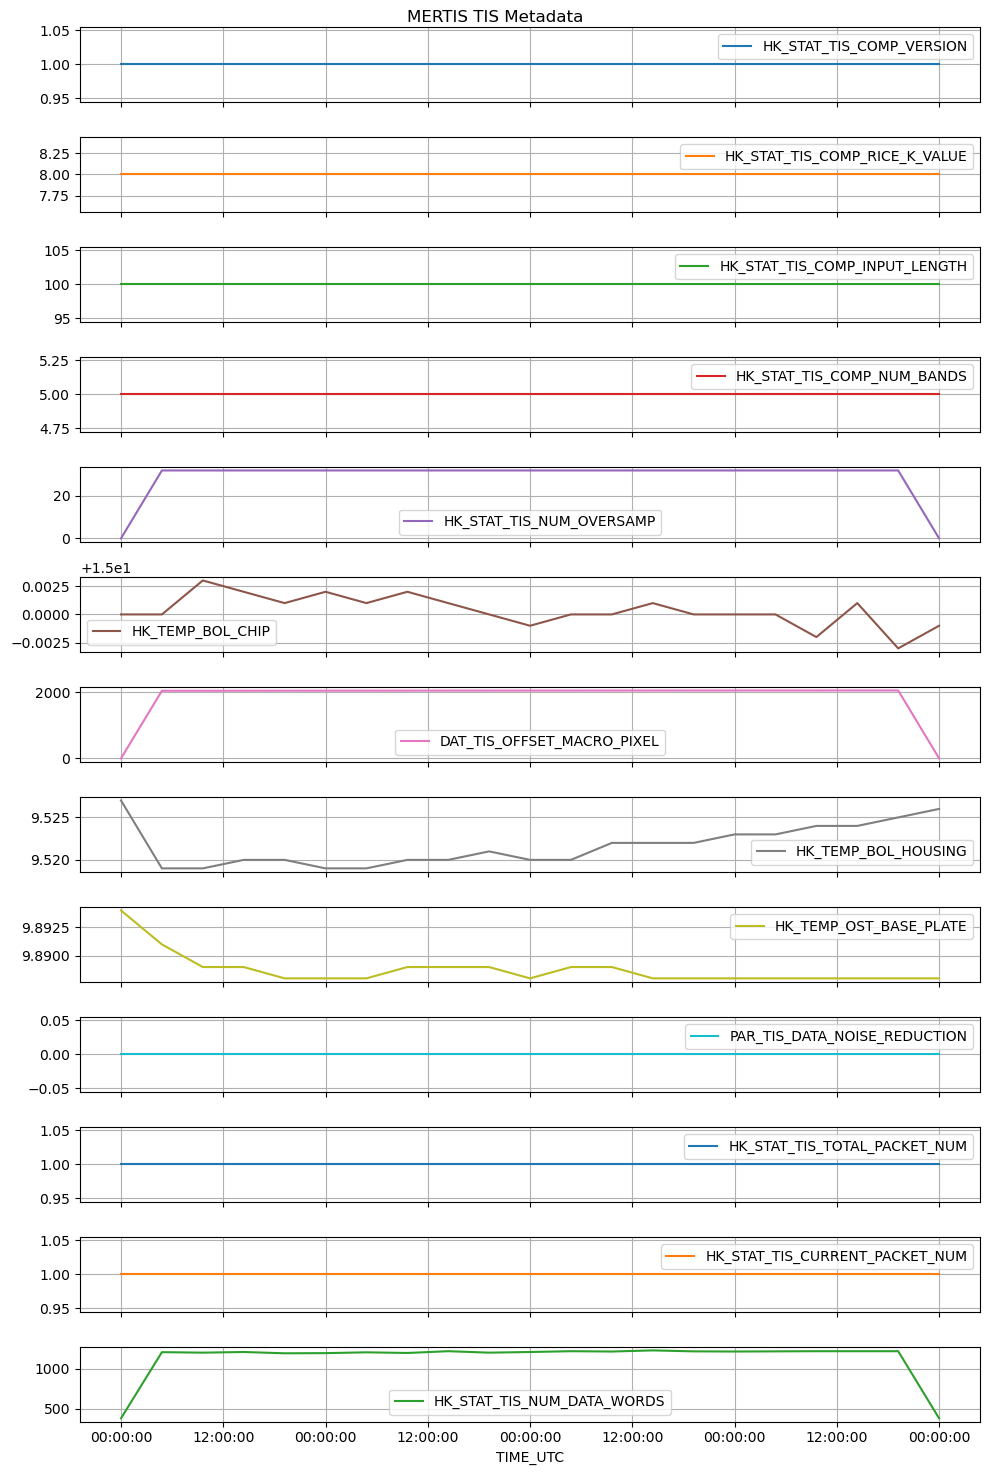

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

ax = ms_reader.mertis_tis_metadata[file_key]\
    .set_index('TIME_UTC').loc[:,'HK_STAT_TIS_COMP_VERSION':]\
        .plot(figsize=[10,15], legend=True, title='MERTIS TIS Metadata', grid=True, subplots=True);

ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax[-1].set_xlabel('TIME_UTC', fontsize=10)
plt.tight_layout()

plt.tight_layout()

Now some data from TIS detector, each one a 2D array.

For those data, dufing cruise, the scientific data are collected ueing the Space port and not Planet port.

TIS Datacube size is the union of several TIS 2D array measurement, each one typically `(40, 100)` = (`n_spectral`,`n_spatial`), depending on binning and windowing.

In [ ]:
ms_reader.frames[file_key].shape

(40, 100, 21)

`(40, 100, 21)` = (`n_spectral`,`n_spatial`,`n_frames`)

- `n_spectral` : number of spectral channels, depends on pixel spectral binning (1,2,4) result in `n_spatial` == (80,40,20)
- `n_spatial` : number of measurements spatial pixels, depends on pixel spatial binning (1,2,4) result in `n_spatial` == (100,50,25)
- `n_frames` : number of TIS frames, or measurements, this correspond to the time axis.

plot_index: RangeIndex(start=0, stop=21, step=1)


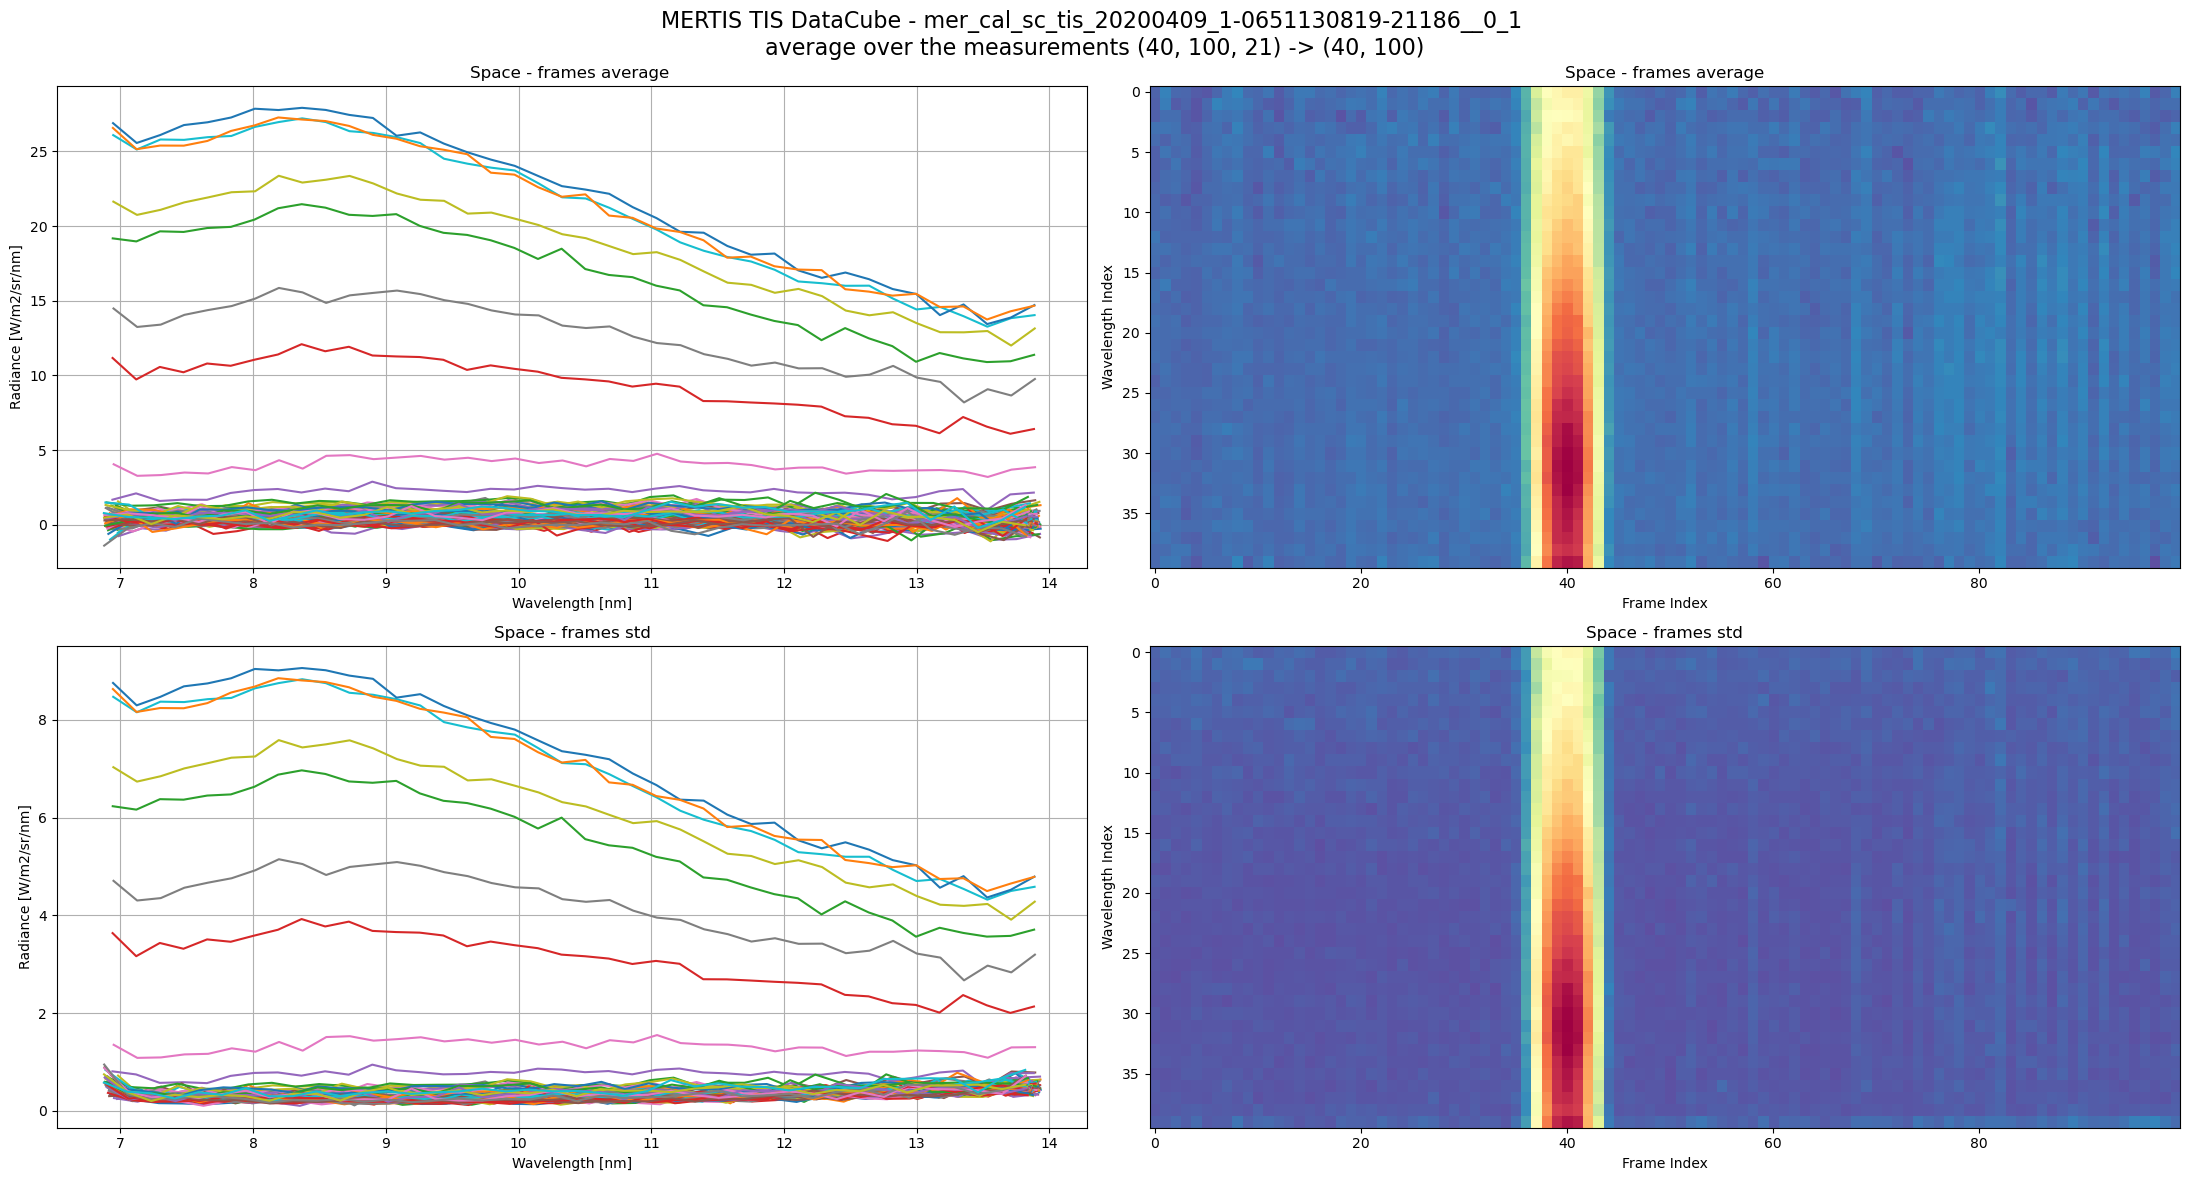

In [ ]:
full_frames_3D = ms_reader.frames[file_key]
wav = ms_reader.wavelengths[file_key]
plot_index = ms_reader.space_index[file_key]
print(f'plot_index: {plot_index}')

fig, ax = plt.subplots(ncols=2,nrows=2, figsize = [22,12])

fig.suptitle(f'MERTIS TIS DataCube - {file_key} \n'
             f'average over the measurements {full_frames_3D.shape} -> {full_frames_3D[:,:,0].shape}',
             fontsize=16)
title = 'Space'
ax[0][0].plot(wav,full_frames_3D[:,:,plot_index].mean(axis=2));
ax[0][0].set_title(f'{title} - frames average ')
ax[0][1].imshow(full_frames_3D[:,:,plot_index].mean(axis=2),aspect='auto',cmap=plt.cm.Spectral_r)
ax[0][1].set_title(f'{title} - frames average')

ax[1][0].set_title(f'{title} - frames std')
ax[1][0].plot(wav,full_frames_3D[:,:,plot_index].std(axis=2));
ax[1][1].set_title(f'{title} - frames std')
ax[1][1].imshow(full_frames_3D[:,:,plot_index].std(axis=2),aspect='auto',cmap=plt.cm.Spectral_r)

_ = [a.set_xlabel('Wavelength [nm]') for a in ax[:,0]]
_ = [a.set_ylabel('Radiance [W/m2/sr/nm]') for a in ax[:,0]]
_ = [a.grid(True) for a in ax[:,0]]

_ = [a.set_xlabel('Frame Index') for a in ax[:,1]]
_ = [a.set_ylabel('Wavelength Index') for a in ax[:,1]]

plt.tight_layout()

Text(0, 0.5, 'TIS Spatial Pixel Index')

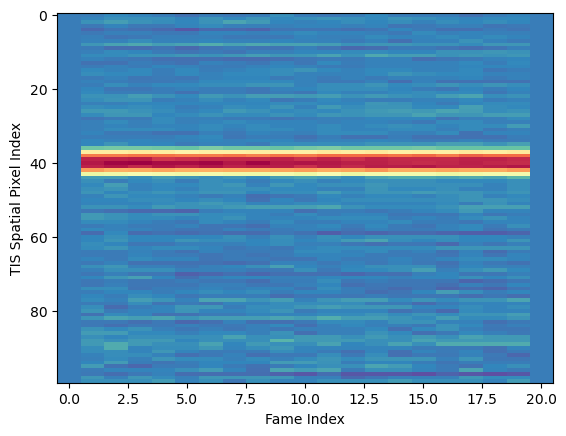

In [ ]:
plt.imshow(full_frames_3D[-1,:,plot_index].T,aspect='auto',cmap=plt.cm.Spectral_r)

plt.xlabel('Fame Index')
plt.ylabel('TIS Spatial Pixel Index')

The higher level pixel near 40 are the "first light" MERTIS ever saw in space, from the Moon.

Now some geometry data , not available in RAW data.

In [ ]:
rich.print(ms_reader.geom_ls[file_key].keys())

dict_keys(['MERTIS_TIS_GEOMETRY_TARGET_LONGITUDE', 'MERTIS_TIS_GEOMETRY_TARGET_LATITUDE', 
'MERTIS_TIS_GEOMETRY_SUBSPACECRAFT_LONGITUDE', 'MERTIS_TIS_GEOMETRY_SUBSPACECRAFT_LATITUDE', 
'MERTIS_TIS_GEOMETRY_SUB_SUN_LONGITUDE', 'MERTIS_TIS_GEOMETRY_SUB_SUN_LATITUDE', 
'MERTIS_TIS_GEOMETRY_TARGET_ALTITUDE', 'MERTIS_TIS_GEOMETRY_SUBSPACECRAFT_ALTITUDE', 
'MERTIS_TIS_GEOMETRY_SUB_SUN_ALTITUDE', 'MERTIS_TIS_GEOMETRY_TARGET_DISTANCE', 
'MERTIS_TIS_GEOMETRY_TARGET_ANGULAR_DIAMETER', 'MERTIS_TIS_GEOMETRY_LOCAL_TIME', 
'MERTIS_TIS_GEOMETRY_TARGET_PHASE_ANGLE', 'MERTIS_TIS_GEOMETRY_TARGET_EMISSION_ANGLE', 
'MERTIS_TIS_GEOMETRY_TARGET_INCIDENCE_ANGLE'])

In [ ]:
ms_reader.geom_ls[file_key]['MERTIS_TIS_GEOMETRY_TARGET_LONGITUDE'].shape

(5, 100, 21)

The dimension for the geoemtry variables are  `(5, 100, 21)` == (corners, n_spatial, n_frames) :

- **Corners** of each pixel used for SPICE calculation, in order, looking from instrument , X axis up = (center, upper left, upper right, lower right, lower left)

```
C2       C1
 +-------+
 |       |
 |  C0   |
 |       |
 +-------+
C3      C4
```

- `n_spatial` : number of measurements spatial pixels, depends on pixel spatial binning (1,2,4) result in `n_spatial` == (100,50,25)
-  `n_frames` : number of TIS frames, or measurements, this correspond to the time axis in the TIS datacube.

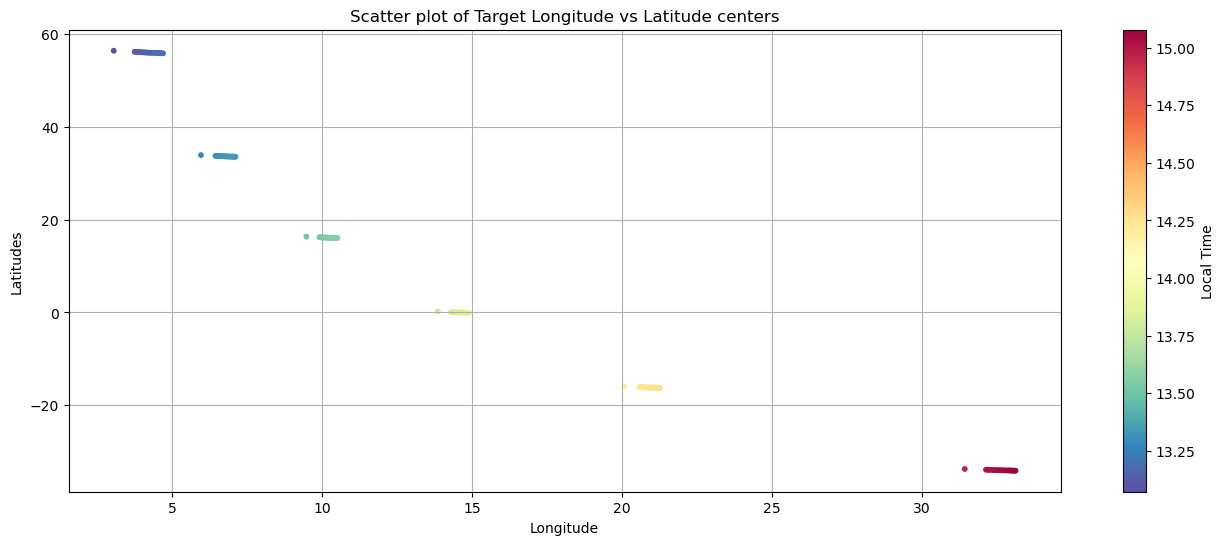

In [ ]:
plt.figure(figsize=(16, 6))
longitudes = ms_reader.geom_ls[file_key]['MERTIS_TIS_GEOMETRY_TARGET_LONGITUDE']
longitudes_center = longitudes[0,:,:]
latitudes = ms_reader.geom_ls[file_key]['MERTIS_TIS_GEOMETRY_TARGET_LATITUDE']
latitudes_center = latitudes[0,:,:]

local_times = ms_reader.geom_ls[file_key]['MERTIS_TIS_GEOMETRY_LOCAL_TIME']
local_times_center = local_times[0,:,:]

sc = plt.scatter(longitudes_center.flatten(), latitudes_center.flatten(), c=local_times_center.flatten(), s=10, cmap='Spectral_r')
plt.xlabel('Longitude')
cbar = plt.colorbar(sc)
cbar.set_label('Local Time')
plt.ylabel('Latitudes')
plt.title('Scatter plot of Target Longitude vs Latitude centers')
plt.grid(True)
plt.show()

Let's find some TIS sptail pixels with defined geometries on all corners 

In [ ]:
import numpy as np

arr = latitudes  # shape (5, 100, 21)
not_nan_mask = ~np.isnan(arr)
all_not_nan = np.all(not_nan_mask, axis=0)  # shape (100, 21)
indices = np.argwhere(all_not_nan)  # returns (i, j) pairs where all axis=0 are not nan

print(len(indices))
print(indices[:5])

105
[[38  0]
 [38  1]
 [38  2]
 [38  3]
 [38  4]]


Text(31.43904149826383, -33.20697106068339, 'Center')

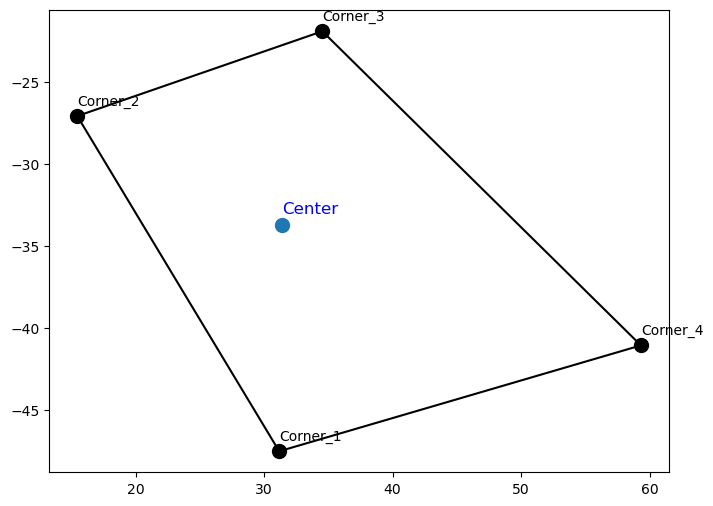

In [ ]:
plt.figure(figsize=(8, 6))

pixel_index = indices[0]  # Take the first valid pixel for demonstration

# Plot the corners of the polygon
plt.scatter(longitudes[1:,pixel_index[0],pixel_index[1] ], latitudes[1:,pixel_index[0],pixel_index[1] ], s=100, c='black')

# Extract the longitude and latitude for the corners (1:5), close the polygon by repeating the first corner
poly_lons = longitudes[1:, pixel_index[0], pixel_index[1]]
poly_lats = latitudes[1:, pixel_index[0], pixel_index[1]]
# Close the polygon
poly_lons = np.append(poly_lons, poly_lons[0])
poly_lats = np.append(poly_lats, poly_lats[0])

for i in range(1, 5):
    plt.text(
        poly_lons[i-1],
        poly_lats[i-1]+0.5,  # Offset the text slightly above the point
        f'Corner_{i}',
        fontsize=10,
        color='black',
        ha='left',
        va='bottom'
    )

# Plot the connecting lines
plt.plot(poly_lons, poly_lats, linestyle='-', color='black')

plt.scatter(longitudes[0,pixel_index[0],pixel_index[1] ], latitudes[0,pixel_index[0],pixel_index[1] ], s=100)
plt.text(
    longitudes[0, pixel_index[0], pixel_index[1]],
    latitudes[0, pixel_index[0], pixel_index[1]]+0.5,  # Offset the text slightly above the point
    'Center',
    fontsize=12,
    color='blue',
    ha='left',
    va='bottom'
)